In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DrDoS_DNS_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_DNS_data_2_0_per.csv')
DrDoS_LDAP_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_LDAP_data_2_0_per.csv')
DrDoS_MSSQL_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_MSSQL_data_2_0_per.csv')
DrDoS_NetBIOS_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_NetBIOS_data_2_0_per.csv')
DrDoS_NTP_data_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_NTP_data_2_0_per.csv')
DrDoS_SNMP_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_SNMP_data_2_0_per.csv')
DrDoS_SSDP_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_SSDP_data_2_0_per.csv')
DrDoS_UDP_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_UDP_data_2_0_per.csv')
Syn_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/Syn_data.csv')
UDPLag_data_2_0_per = pd.read_csv('/content/drive/MyDrive/DDos Dataset/DrDoS_UDPLag_data_2_0_per.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Merge all the Dataset to make one data 
data = pd.concat([DrDoS_DNS_data_2_0_per, DrDoS_LDAP_data_2_0_per, DrDoS_MSSQL_data_2_0_per, DrDoS_NetBIOS_data_2_0_per, DrDoS_NTP_data_data_2_0_per, DrDoS_SNMP_data_2_0_per, DrDoS_SSDP_data_2_0_per, DrDoS_UDP_data_2_0_per, Syn_data_2_0_per, UDPLag_data_2_0_per], ignore_index = True)

In [ ]:
#data_df.to_csv('data_final.csv', index = False)
#from google.colab import files
#files.download('data_final.csv')

In [ ]:
data.shape

(742925, 89)

In [ ]:
data[' Label'].value_counts()

DrDoS_SNMP       128993
DrDoS_DNS        126779
DrDoS_MSSQL      113062
DrDoS_NetBIOS    102334
DrDoS_UDP         78380
DrDoS_SSDP        65270
DrDoS_LDAP        54496
Syn               34505
DrDoS_NTP         30058
UDP-lag            8266
BENIGN              774
WebDDoS               8
Name:  Label, dtype: int64

In [ ]:
# Drop Unnamed:0, Unnamed:0.1 columns 
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [ ]:
data.columns 

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
data_real = data.replace(np.inf, np.nan)

In [ ]:
data_real.isnull().sum().sum()

27886

In [ ]:
data_df = data_real.dropna(axis=0)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
data_df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-702-19002-17,172.16.0.5,702,192.168.50.1,19002,17,2018-12-01 11:08:37.221226,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-647-55666-17,172.16.0.5,647,192.168.50.1,55666,17,2018-12-01 11:11:35.264967,48,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-564-64440-17,172.16.0.5,564,192.168.50.1,64440,17,2018-12-01 11:14:31.706047,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-662-57255-17,172.16.0.5,662,192.168.50.1,57255,17,2018-12-01 11:07:46.876001,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-676-32822-17,172.16.0.5,676,192.168.50.1,32822,17,2018-12-01 11:13:59.869883,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742920,172.16.0.5-192.168.50.1-59112-59112-17,172.16.0.5,59112,192.168.50.1,59112,17,2018-12-01 13:11:27.719229,122,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
742921,172.16.0.5-192.168.50.1-45040-22860-6,172.16.0.5,45040,192.168.50.1,22860,6,2018-12-01 13:30:03.415687,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
742922,172.16.0.5-192.168.50.1-36575-18862-6,172.16.0.5,36575,192.168.50.1,18862,6,2018-12-01 13:30:13.838633,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
742923,172.16.0.5-192.168.50.1-63440-63440-6,172.16.0.5,63440,192.168.50.1,63440,6,2018-12-01 13:30:00.104494,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


In [ ]:
data_X = data_df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [ ]:
data_X.columns 

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
data_X.shape 

(728982, 85)

In [ ]:
data_y = data_df[' Label']

In [ ]:
data_y.shape 

(728982,)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
data_y.unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
       'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS'], dtype=object)

In [ ]:
data_X 

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,172.16.0.5-192.168.50.1-702-19002-17,172.16.0.5,702,192.168.50.1,19002,17,2018-12-01 11:08:37.221226,2,2,0,...,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,172.16.0.5-192.168.50.1-647-55666-17,172.16.0.5,647,192.168.50.1,55666,17,2018-12-01 11:11:35.264967,48,2,0,...,879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,172.16.0.5-192.168.50.1-564-64440-17,172.16.0.5,564,192.168.50.1,64440,17,2018-12-01 11:14:31.706047,1,2,0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,172.16.0.5-192.168.50.1-662-57255-17,172.16.0.5,662,192.168.50.1,57255,17,2018-12-01 11:07:46.876001,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.16.0.5-192.168.50.1-676-32822-17,172.16.0.5,676,192.168.50.1,32822,17,2018-12-01 11:13:59.869883,1,2,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742920,172.16.0.5-192.168.50.1-59112-59112-17,172.16.0.5,59112,192.168.50.1,59112,17,2018-12-01 13:11:27.719229,122,2,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742921,172.16.0.5-192.168.50.1-45040-22860-6,172.16.0.5,45040,192.168.50.1,22860,6,2018-12-01 13:30:03.415687,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742922,172.16.0.5-192.168.50.1-36575-18862-6,172.16.0.5,36575,192.168.50.1,18862,6,2018-12-01 13:30:13.838633,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742923,172.16.0.5-192.168.50.1-63440-63440-6,172.16.0.5,63440,192.168.50.1,63440,6,2018-12-01 13:30:00.104494,2,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Unique values in each column

In [ ]:
print(data.apply(lambda col: col.unique()))

Flow ID              [172.16.0.5-192.168.50.1-702-19002-17, 172.16....
 Source IP           [172.16.0.5, 192.168.50.7, 192.168.50.1, 192.1...
 Source Port         [702, 647, 564, 662, 676, 760, 660, 561, 983, ...
 Destination IP      [192.168.50.1, 8.8.8.8, 172.16.0.5, 172.217.10...
 Destination Port    [19002, 55666, 64440, 57255, 32822, 17409, 147...
                                           ...                        
 Idle Max            [0.0, 58003726.0, 49451152.0, 10013125.0, 8000...
 Idle Min            [0.0, 10653079.0, 49451152.0, 5583142.0, 80000...
SimillarHTTP         [0, 0, 205.174.165.72/c.php, 205.174.165.72nul...
 Inbound                                                        [1, 0]
 Label               [DrDoS_DNS, BENIGN, DrDoS_LDAP, DrDoS_MSSQL, D...
Length: 87, dtype: object


Numerical Features

In [ ]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 81 and they are : 
 [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' 

Categorical Features

In [ ]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 6 and they are : 
 ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'SimillarHTTP', ' Label']


Number of Unique values in the numerical features

In [ ]:
# number of unique values in each numerical variable
data[numerical_features].nunique(axis=0)

 Source Port          57610
 Destination Port     65509
 Protocol                 3
 Flow Duration        35660
 Total Fwd Packets      217
                      ...  
Idle Mean              5071
 Idle Std              4305
 Idle Max              5070
 Idle Min              5069
 Inbound                  2
Length: 81, dtype: int64

Discrete numerical features

In [ ]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if data[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 21 and they are : 
 [' Protocol', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', ' Inbound']


In [ ]:
data[discrete_feature].head(10)

,Protocol,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,...,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Inbound
0,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
1,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
2,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
3,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
5,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
6,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
7,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
8,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1
9,17,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,1


Continuous features

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 60 and they are : 
 [' Source Port', ' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1

### Label Encoding for the Dataset ###

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
le = LabelEncoder()

In [ ]:
data_y_trans = le.fit_transform(data_y)

In [ ]:
data_y_trans

array([ 1,  1,  1, ..., 10, 10, 10])

In [ ]:
le_fid = LabelEncoder()

In [ ]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [ ]:
le_SIP = LabelEncoder()

In [ ]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [ ]:
le_DIP = LabelEncoder()

In [ ]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [ ]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [ ]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,488670,6,702,71,19002,17,61371,2,2,0,...,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,417171,6,647,71,55666,17,98287,48,2,0,...,879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,285760,6,564,71,64440,17,134744,1,2,0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,444362,6,662,71,57255,17,51215,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,469223,6,676,71,32822,17,128617,1,2,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742920,326283,6,59112,71,59112,17,687248,122,2,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742921,151428,6,45040,71,22860,6,691035,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742922,91333,6,36575,71,18862,6,692344,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742923,402312,6,63440,71,63440,6,690588,2,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
data_X.dtypes

Flow ID                int64
 Source IP             int64
 Source Port           int64
 Destination IP        int64
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
 Inbound               int64
Length: 85, dtype: object

# Feature Selection #

Co-relation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


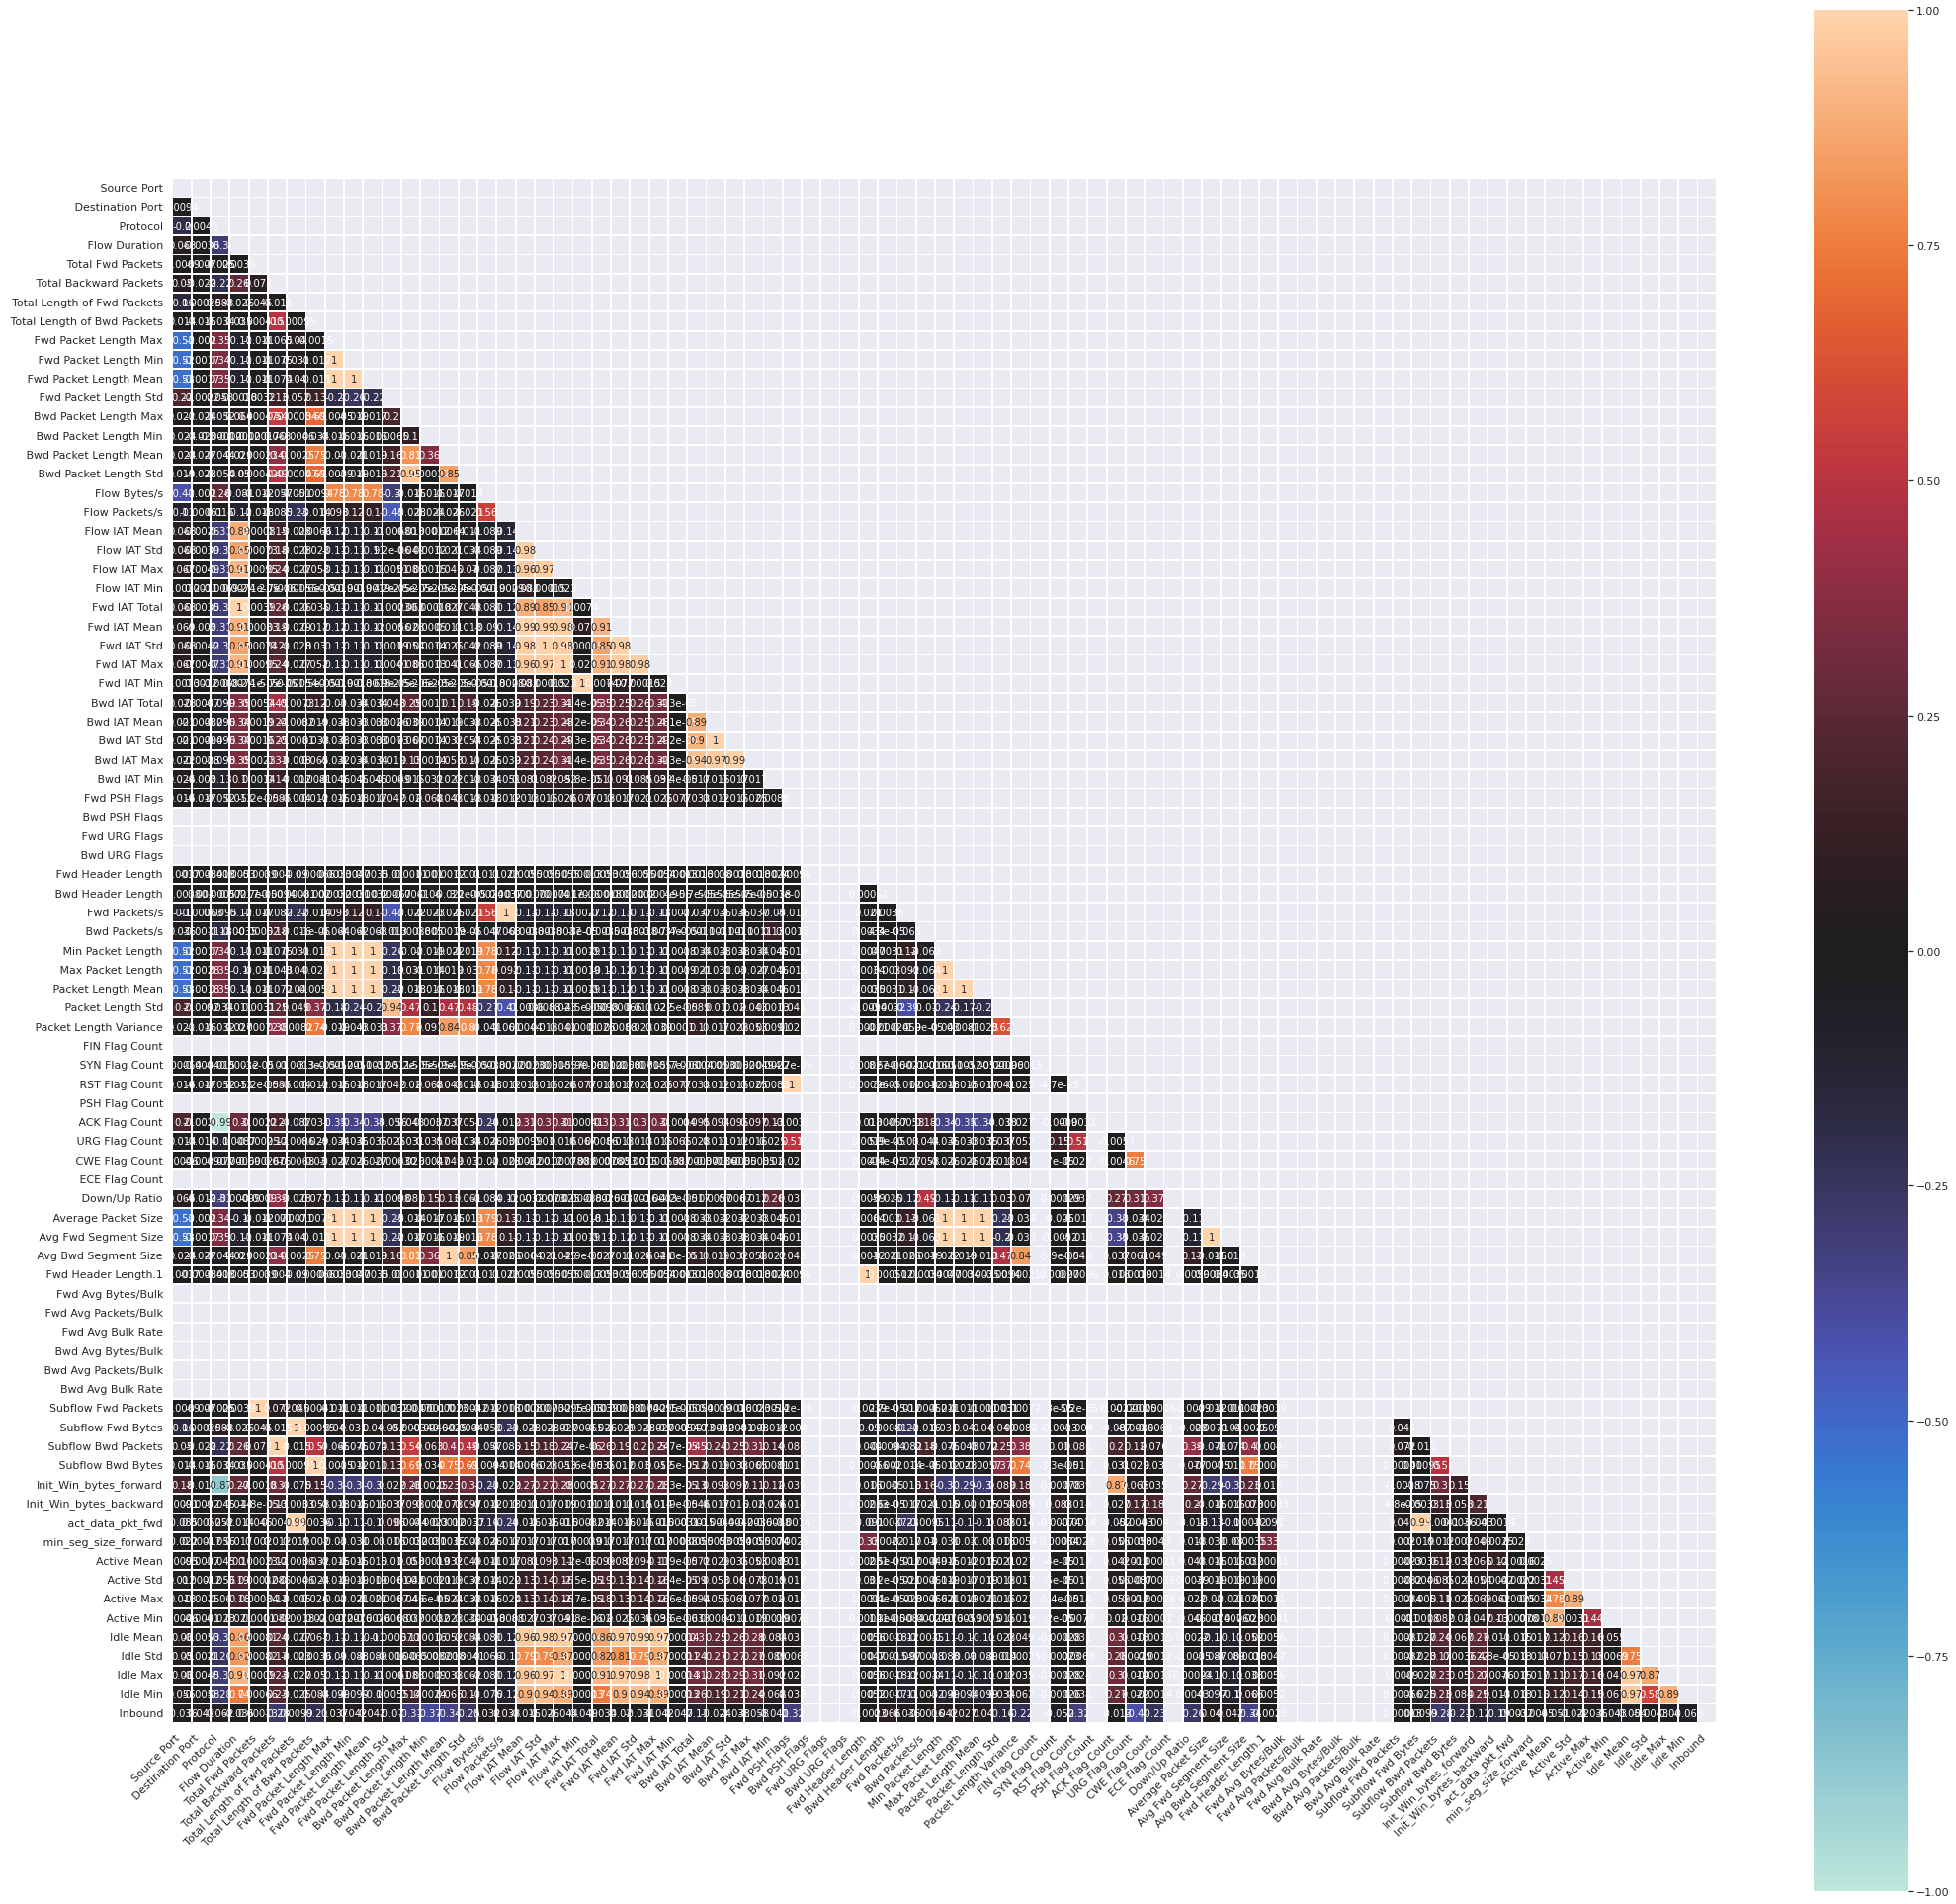

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
fig = plt.figure(figsize=(35,35))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .8,annot_kws = {"size": 10},mask = mask)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.show()

In [ ]:
data_A=data_X > 0

In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(data_A,data_y_trans)
chi_scores

(array([1.29902012e-03, 1.29902012e-03, 6.29027741e-01, 5.19608762e-03,
        6.29027741e-01, 6.29027741e-01, 1.29902012e-03, 5.73963317e-27,
        5.73963317e-27, 1.43307309e+05, 4.04665731e+04, 3.41424599e+05,
        4.04665731e+04, 4.06500257e+04, 4.04665731e+04, 2.67905673e+05,
        3.41424599e+05, 2.77698801e+05, 3.41424599e+05, 8.06299620e+04,
        4.04578552e+04, 5.73963317e-27, 5.73963317e-27, 3.19852854e+05,
        5.73963317e-27, 1.64758716e+04, 3.89270426e+01, 3.89270426e+01,
        3.29911722e+05, 3.89270426e+01, 1.64971452e+04, 1.31955909e+05,
        1.31955909e+05, 4.45740488e+04, 1.31955909e+05, 1.27265353e+05,
        8.16118584e+04,            nan,            nan,            nan,
        2.74926529e+04, 1.41835027e+05, 5.73963317e-27, 1.43307309e+05,
        4.06858995e+04, 4.04578552e+04, 4.04578552e+04, 2.68856250e+05,
        2.68856250e+05,            nan, 1.41621391e+02, 8.16118584e+04,
                   nan, 6.64870522e+05, 2.14167488e+05, 9.398887

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

#feature selection of all features (numeric and categorical features)

model = ExtraTreesClassifier(random_state=42)




In [ ]:
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest
select_best= SelectKBest(chi2, k=20)
X_feat_20 = select_best.fit_transform(data_A, data_y_trans)
X_feat_20.shape

(728982, 20)

In [ ]:
model.feature_importances_

array([2.86019939e-02, 4.07493246e-04, 7.44199125e-02, 1.33598934e-04,
       1.26931506e-02, 8.82716969e-03, 3.55846673e-01, 3.37502895e-03,
       2.29283154e-03, 2.96926688e-05, 8.62799464e-03, 1.31576146e-05,
       3.24512383e-02, 5.01125565e-02, 4.14319256e-02, 3.03643016e-03,
       2.46056337e-05, 3.63673445e-05, 1.55839806e-05, 9.06435820e-06,
       3.66458954e-02, 1.90724086e-02, 3.86674153e-03, 1.27124105e-03,
       2.33730270e-03, 2.95962215e-03, 1.97363792e-03, 2.37859873e-03,
       1.14450927e-03, 2.88519818e-03, 2.16494841e-03, 3.30053918e-05,
       3.77964034e-05, 2.70297781e-05, 3.16231641e-05, 3.89004247e-05,
       1.81114770e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.67931494e-03, 6.05334450e-05, 2.01226182e-02, 9.32263058e-05,
       4.92127005e-02, 3.22074121e-02, 4.63534748e-02, 2.13639028e-03,
       5.38642841e-04, 0.00000000e+00, 2.81197526e-06, 1.98669114e-05,
       0.00000000e+00, 1.70495808e-02, 1.28090320e-04, 4.66275114e-05,
      

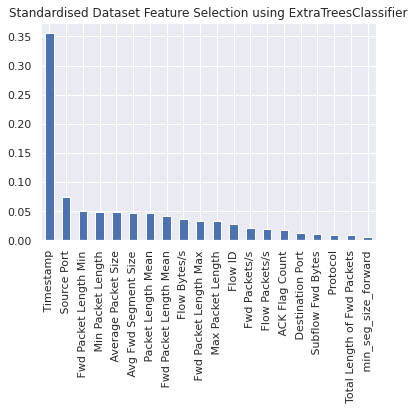

In [ ]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
data_X.shape 

(728982, 85)

In [ ]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [ ]:
data_new_20features_X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
0,61371,702,1472.0,1472.0,488670,1472.0,1472.0,2208.0,0,1472.0,1472.0,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,19002,1
1,98287,647,1448.0,1448.0,417171,1448.0,1448.0,2172.0,0,1448.0,1448.0,6.033333e+07,1448.0,17,4.166667e+04,4.166667e+04,2896.0,2896,55666,1
2,134744,564,1472.0,1472.0,285760,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,64440,1
3,51215,662,1472.0,1472.0,444362,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,57255,1
4,128617,676,1472.0,1472.0,469223,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,32822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742920,687248,59112,520.0,1472.0,326283,1091.2,1472.0,1364.0,0,1472.0,1472.0,3.265574e+07,1472.0,17,1.639344e+04,3.278689e+04,2944.0,2944,59112,1
742921,691035,45040,0.0,0.0,151428,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,2.000000e+06,2.000000e+06,0.0,0,22860,0
742922,692344,36575,0.0,0.0,91333,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,2.000000e+06,2.000000e+06,0.0,0,18862,0
742923,690588,63440,0.0,0.0,402312,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,1.000000e+06,1.000000e+06,0.0,0,63440,0


### Train Test Split Normal dataset 85 Features 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [ ]:
X_train.shape 

(510287, 85)

In [ ]:
X_test.shape 

(218695, 85)

### Standardization of the 85 Feature Dataset 

In [ ]:

from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

### Train Test Split 20 Feature Dataset 

In [ ]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

### Standardization of the 20 Feature Dataset 

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [ ]:
X_train_std_20.shape 

(510287, 20)

In [ ]:
y_train_20.shape

(510287,)

In [ ]:
X_test_std_20.shape 

(218695, 20)

In [ ]:
y_test_20.shape 

(218695,)

### 1. Random Forest Classification 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)


RandomForestClassifier()

In [ ]:
rf_y_pred = rf.predict(X_test_std_20)

In [ ]:
rf_y_pred

array([5, 2, 3, ..., 1, 2, 3])

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [ ]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       0.93      1.00      0.97       238
    DrDoS_DNS       0.99      1.00      0.99     36586
   DrDoS_LDAP       0.99      0.99      0.99     16061
  DrDoS_MSSQL       1.00      0.99      1.00     32963
    DrDoS_NTP       0.99      0.97      0.98      9064
DrDoS_NetBIOS       1.00      1.00      1.00     29779
   DrDoS_SNMP       1.00      1.00      1.00     38531
   DrDoS_SSDP       1.00      1.00      1.00     19514
    DrDoS_UDP       1.00      1.00      1.00     23196
          Syn       1.00      1.00      1.00     10330
      UDP-lag       0.99      0.97      0.98      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           0.99    218695
    macro avg       0.91      0.91      0.91    218695
 weighted avg       0.99      0.99      0.99    218695



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[  238     0     0     0     0     0     0     0     0     0     0     0]
 [    0 36507     0     0    79     0     0     0     0     0     0     0]
 [    1   171 15886     3     0     0     0     0     0     0     0     0]
 [    1     0   171 32791     0     0     0     0     0     0     0     0]
 [    0   302     0     0  8762     0     0     0     0     0     0     0]
 [    1     0     0   125     0 29652     1     0     0     0     0     0]
 [    5     0     0     0     0    97 38427     2     0     0     0     0]
 [    0     0     0     0     0     3    71 19439     1     0     0     0]
 [    7     0     0     0     0     2     0    87 23098     0     2     0]
 [    0     0     0     0     0     0     0     0     0 10307    23     0]
 [    1     0     0     0     0     2     1     1    62     0  2365     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]]


In [ ]:
Classifier_accuracy = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", Classifier_accuracy*100)

Accuracy Score for Random_Forest: 
 99.4407736802396


In [ ]:
# RoC curve Function 

def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()



In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


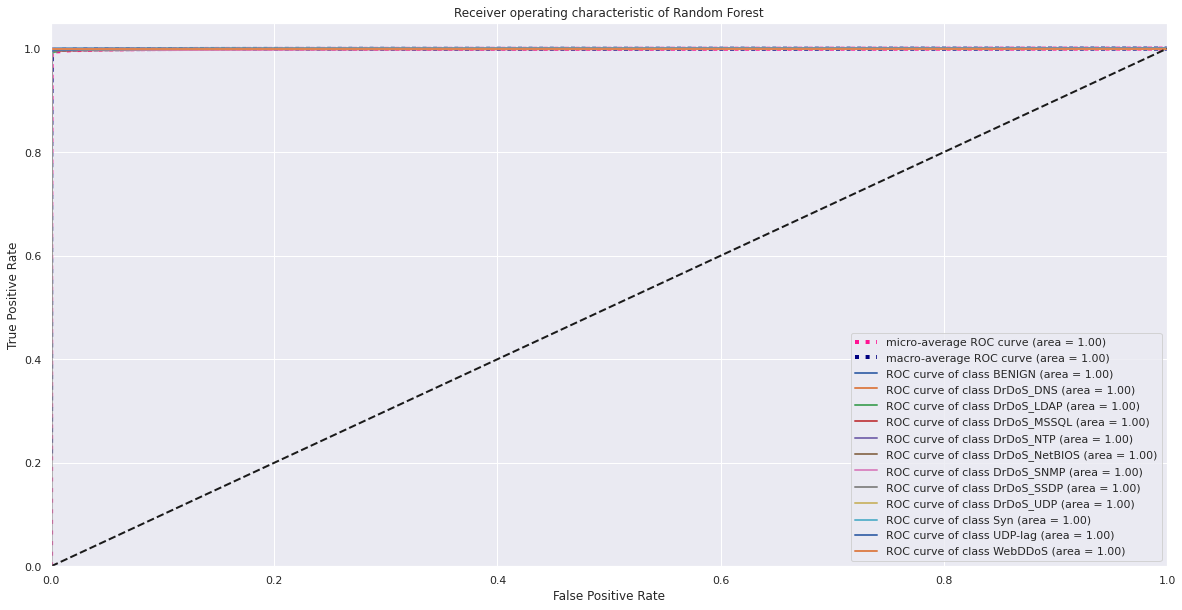

In [ ]:
title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

### 2. Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)


DecisionTreeClassifier()

In [ ]:
dt_y_pred = dt.predict(X_test_std_20)

In [ ]:
print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

Classification Report for Decision Tree: 
                precision    recall  f1-score   support

       BENIGN       1.00      0.23      0.38       238
    DrDoS_DNS       1.00      1.00      1.00     36586
   DrDoS_LDAP       0.99      0.99      0.99     16061
  DrDoS_MSSQL       1.00      0.99      1.00     32963
    DrDoS_NTP       0.97      1.00      0.99      9064
DrDoS_NetBIOS       1.00      1.00      1.00     29779
   DrDoS_SNMP       1.00      1.00      1.00     38531
   DrDoS_SSDP       1.00      1.00      1.00     19514
    DrDoS_UDP       1.00      1.00      1.00     23196
          Syn       1.00      1.00      1.00     10330
      UDP-lag       0.98      0.99      0.99      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           1.00    218695
    macro avg       0.91      0.85      0.86    218695
 weighted avg       1.00      1.00      0.99    218695



In [ ]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

Decision Tree Confusion: 
 [[   55    14    11    14    96    10     9     4     6     0    18     1]
 [    0 36406     0     0   180     0     0     0     0     0     0     0]
 [    0   168 15893     0     0     0     0     0     0     0     0     0]
 [    0     0   169 32794     0     0     0     0     0     0     0     0]
 [    0     0     0     0  9064     0     0     0     0     0     0     0]
 [    0     0     0   121     0 29658     0     0     0     0     0     0]
 [    0     0     0     0     0    96 38435     0     0     0     0     0]
 [    0     0     0     0     0     0    63 19451     0     0     0     0]
 [    0     0     0     0     0     0     0    49 23147     0     0     0]
 [    0     0     0     0     0     0     0     0     0 10307    23     0]
 [    0     0     0     0     0     0     0     0    17     0  2415     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0]]


In [ ]:
Classifier_accuracy = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", Classifier_accuracy*100)

Accuracy Score for Decision Tree: 
 99.51073412743776


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


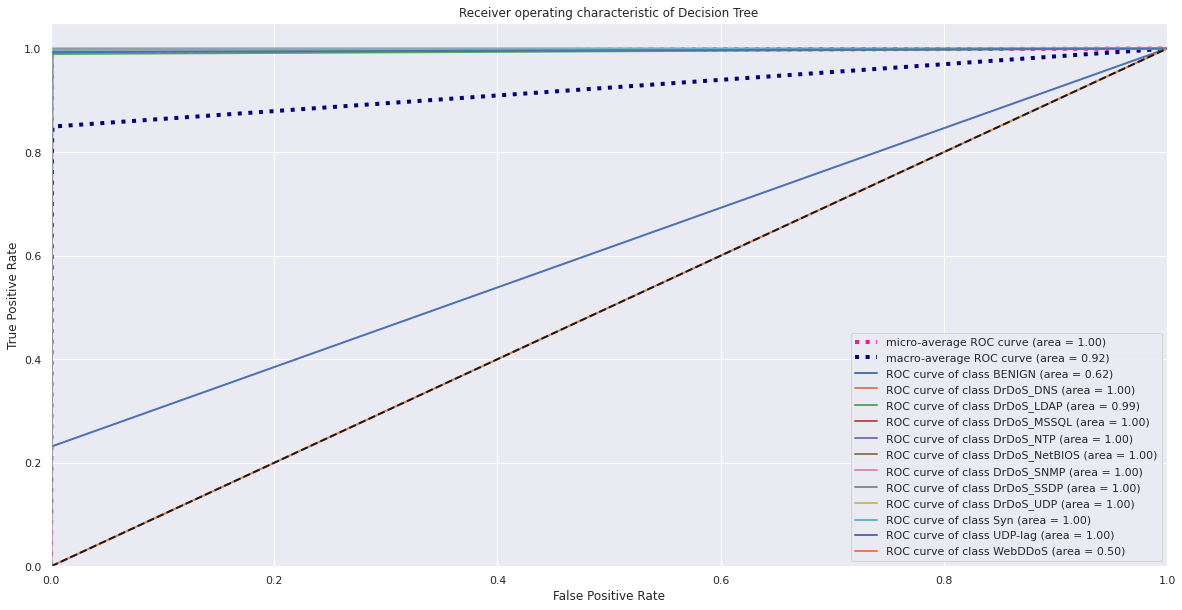

In [ ]:
# RoC Curve 
title = 'Receiver operating characteristic of Decision Tree'
RoC_Curve(dt, X_test_std_20, y_test_20, title)

### 3. SVM 

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC(multi_class = 'ovr')
svm.fit(X_train_std_20, y_train_20)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
y_pred_svm = svm.predict(X_test_std_20) 

In [ ]:
svm.score(X_test_std_20, y_test_20)

0.9225039438487391

In [ ]:
print("Classification Report for SVM: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_svm)))

Classification Report for SVM: 
                precision    recall  f1-score   support

       BENIGN       0.94      0.76      0.84       238
    DrDoS_DNS       0.84      0.98      0.90     36586
   DrDoS_LDAP       0.97      0.59      0.73     16061
  DrDoS_MSSQL       0.95      0.94      0.94     32963
    DrDoS_NTP       0.99      0.96      0.97      9064
DrDoS_NetBIOS       0.88      0.99      0.93     29779
   DrDoS_SNMP       0.99      0.95      0.97     38531
   DrDoS_SSDP       1.00      0.84      0.92     19514
    DrDoS_UDP       0.92      1.00      0.96     23196
          Syn       0.88      1.00      0.94     10330
      UDP-lag       0.79      0.28      0.41      2432
      WebDDoS       0.25      1.00      0.40         1

     accuracy                           0.92    218695
    macro avg       0.87      0.86      0.83    218695
 weighted avg       0.93      0.92      0.92    218695



In [ ]:
svm_conf_mat = confusion_matrix(y_test_20, y_pred_svm)
print("SVM Confusion Matrix: \n", svm_conf_mat)

SVM Confusion Matrix: 
 [[  180     1     0    42     1     1     2     0    11     0     0     0]
 [    2 35698    14   258    79   520     0     0     0     0    15     0]
 [    0  6551  9450    44     0    10     0     0     0     0     6     0]
 [    1     0   285 30913     0  1592    22     8     0     0   142     0]
 [    4   390     0     4  8666     0     0     0     0     0     0     0]
 [    1     0     0   321     0 29448     2     0     0     0     7     0]
 [    1     1     0     2     0  1728 36785     4     0     0     9     1]
 [    0     0     0  1118     0     8   334 16489  1565     0     0     0]
 [    2     0     0     0     0     5    52    17 23118     0     0     2]
 [    0     0     0     0     0     0     0     0     5 10325     0     0]
 [    0     0     1     0     0     0    15     0   328  1414   674     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1]]


In [ ]:
Classifier_accuracy = accuracy_score(y_test_20, y_pred_svm)
print("Accuracy Score for SVM: \n", Classifier_accuracy*100)

Accuracy Score for SVM: 
 92.25039438487391


In [ ]:
# RoC Curve 
# RoC curve Function 

def RoC_Curve_SVM(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.decision_function(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


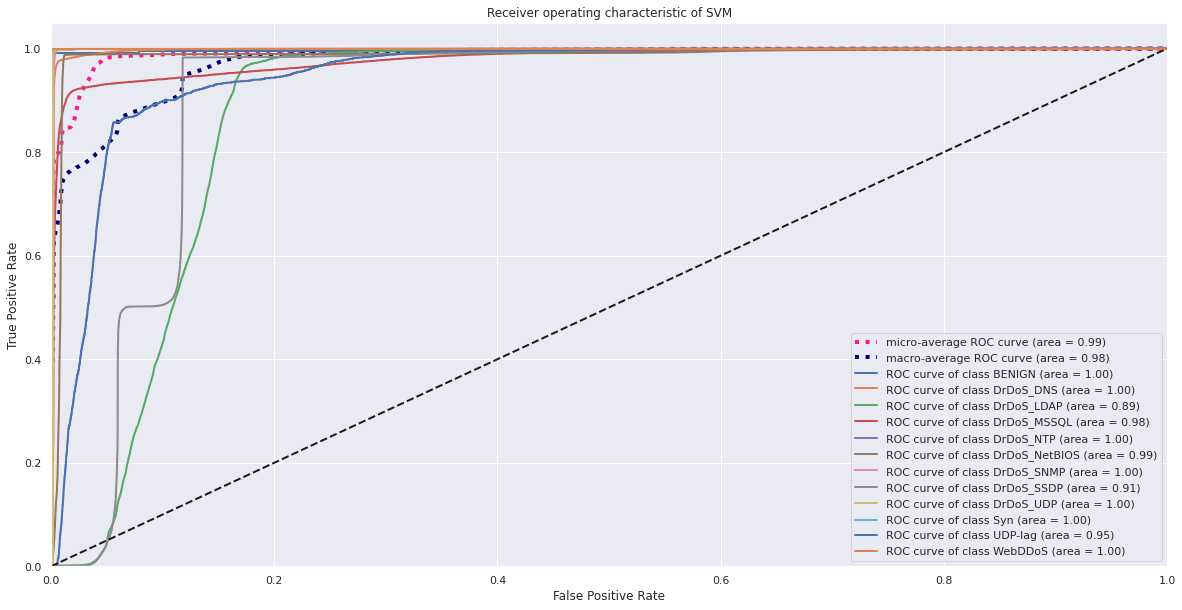

In [ ]:
# RoC Curve 
title = 'Receiver operating characteristic of SVM'
RoC_Curve_SVM(svm, X_test_std_20, y_test_20, title)

Comparison

In [ ]:
Classifier_names = ["Random Forest Classification","Decision Tree","SVM"]
acc = ["99.44","99.51","92.24"]

In [ ]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = acc
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(3)

,name,Accuracy
1,Decision Tree,99.51
0,Random Forest Classification,99.44
2,SVM,92.24


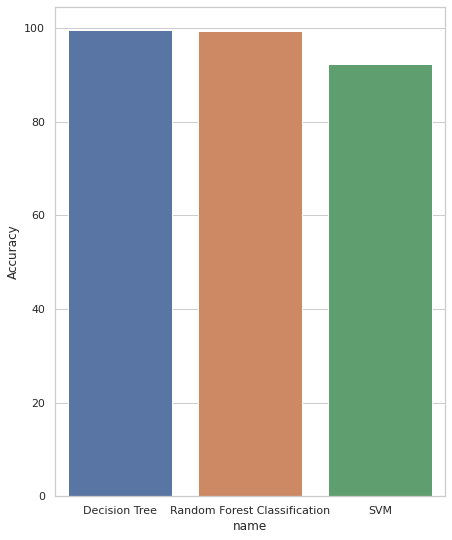

In [ ]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,9)})


df_clf = df_clf.explode('Accuracy')
df_clf['Accuracy'] = df_clf['Accuracy'].astype('float')
#sns.violinplot(data=df_clf, x='name', y='Accuracy')
ax = sns.barplot(x="name", y="Accuracy", data=df_clf)

### Thus, we conclude that by applying decision tree algorithm on twenty best features which are extracted from ###
### co-relation ,chi-square and extra tree classifier method , we can get high accuracy .  ###